## 1. Download the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the dataset

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## 3. Perform Visualizations

   ### i) Univariate Analysis

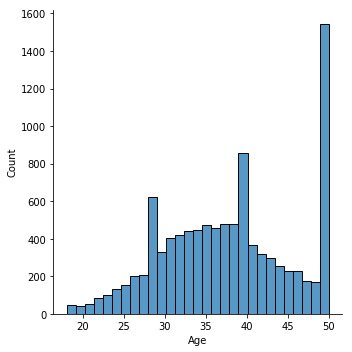

In [317]:
sns.displot(df["Age"])

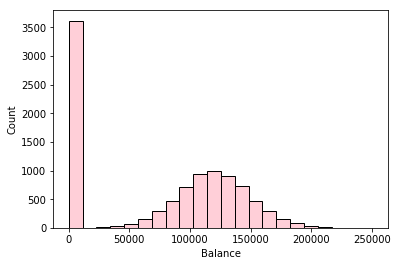

In [6]:
sns.histplot(df["Balance"],color = "pink")

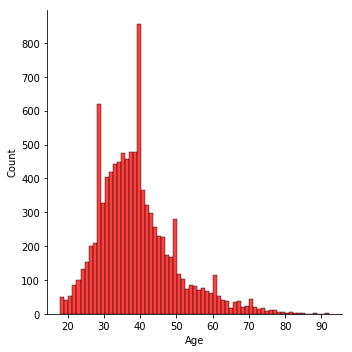

In [7]:
sns.displot(df["Age"],color = "red")

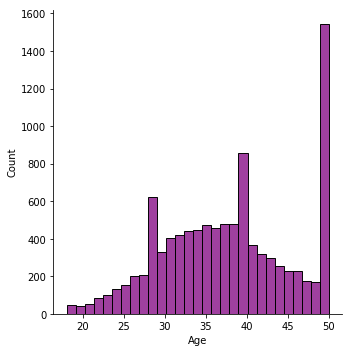

In [320]:
sns.displot(df["Age"],color = "purple")

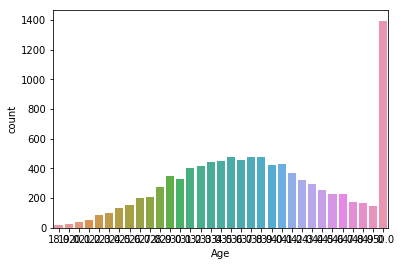

In [321]:
sns.countplot(x = 'Age', data = df) 

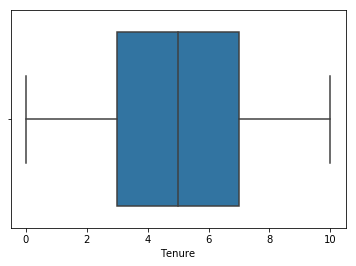

In [322]:
sns.boxplot(x = 'Tenure', data = df)

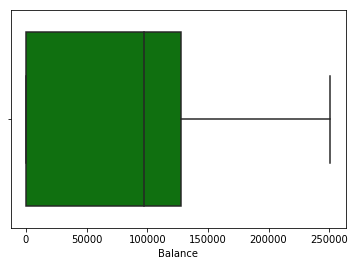

In [323]:
sns.boxplot(x = 'Balance', data = df, color = 'green')

### ii) Bivariate Analysis

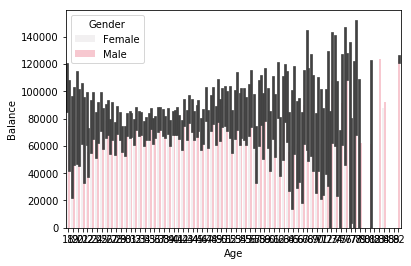

In [12]:
sns.barplot(x = 'Age', y = 'Balance', data = df, hue = 'Gender', color = 'pink')

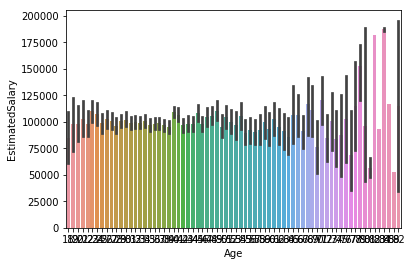

In [13]:
sns.barplot(x = 'Age', y = 'EstimatedSalary', data = df)

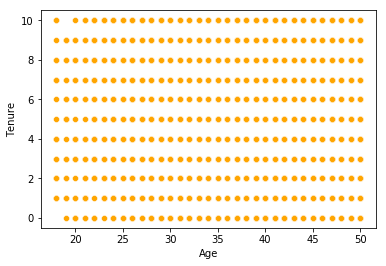

In [324]:
sns.scatterplot(x = 'Age',y = 'Tenure', data = df,color='orange')

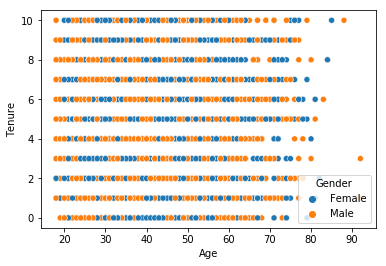

In [15]:
sns.scatterplot(x = 'Age', y = 'Tenure', hue = 'Gender',data = df)

### iii) Multivariate Analysis

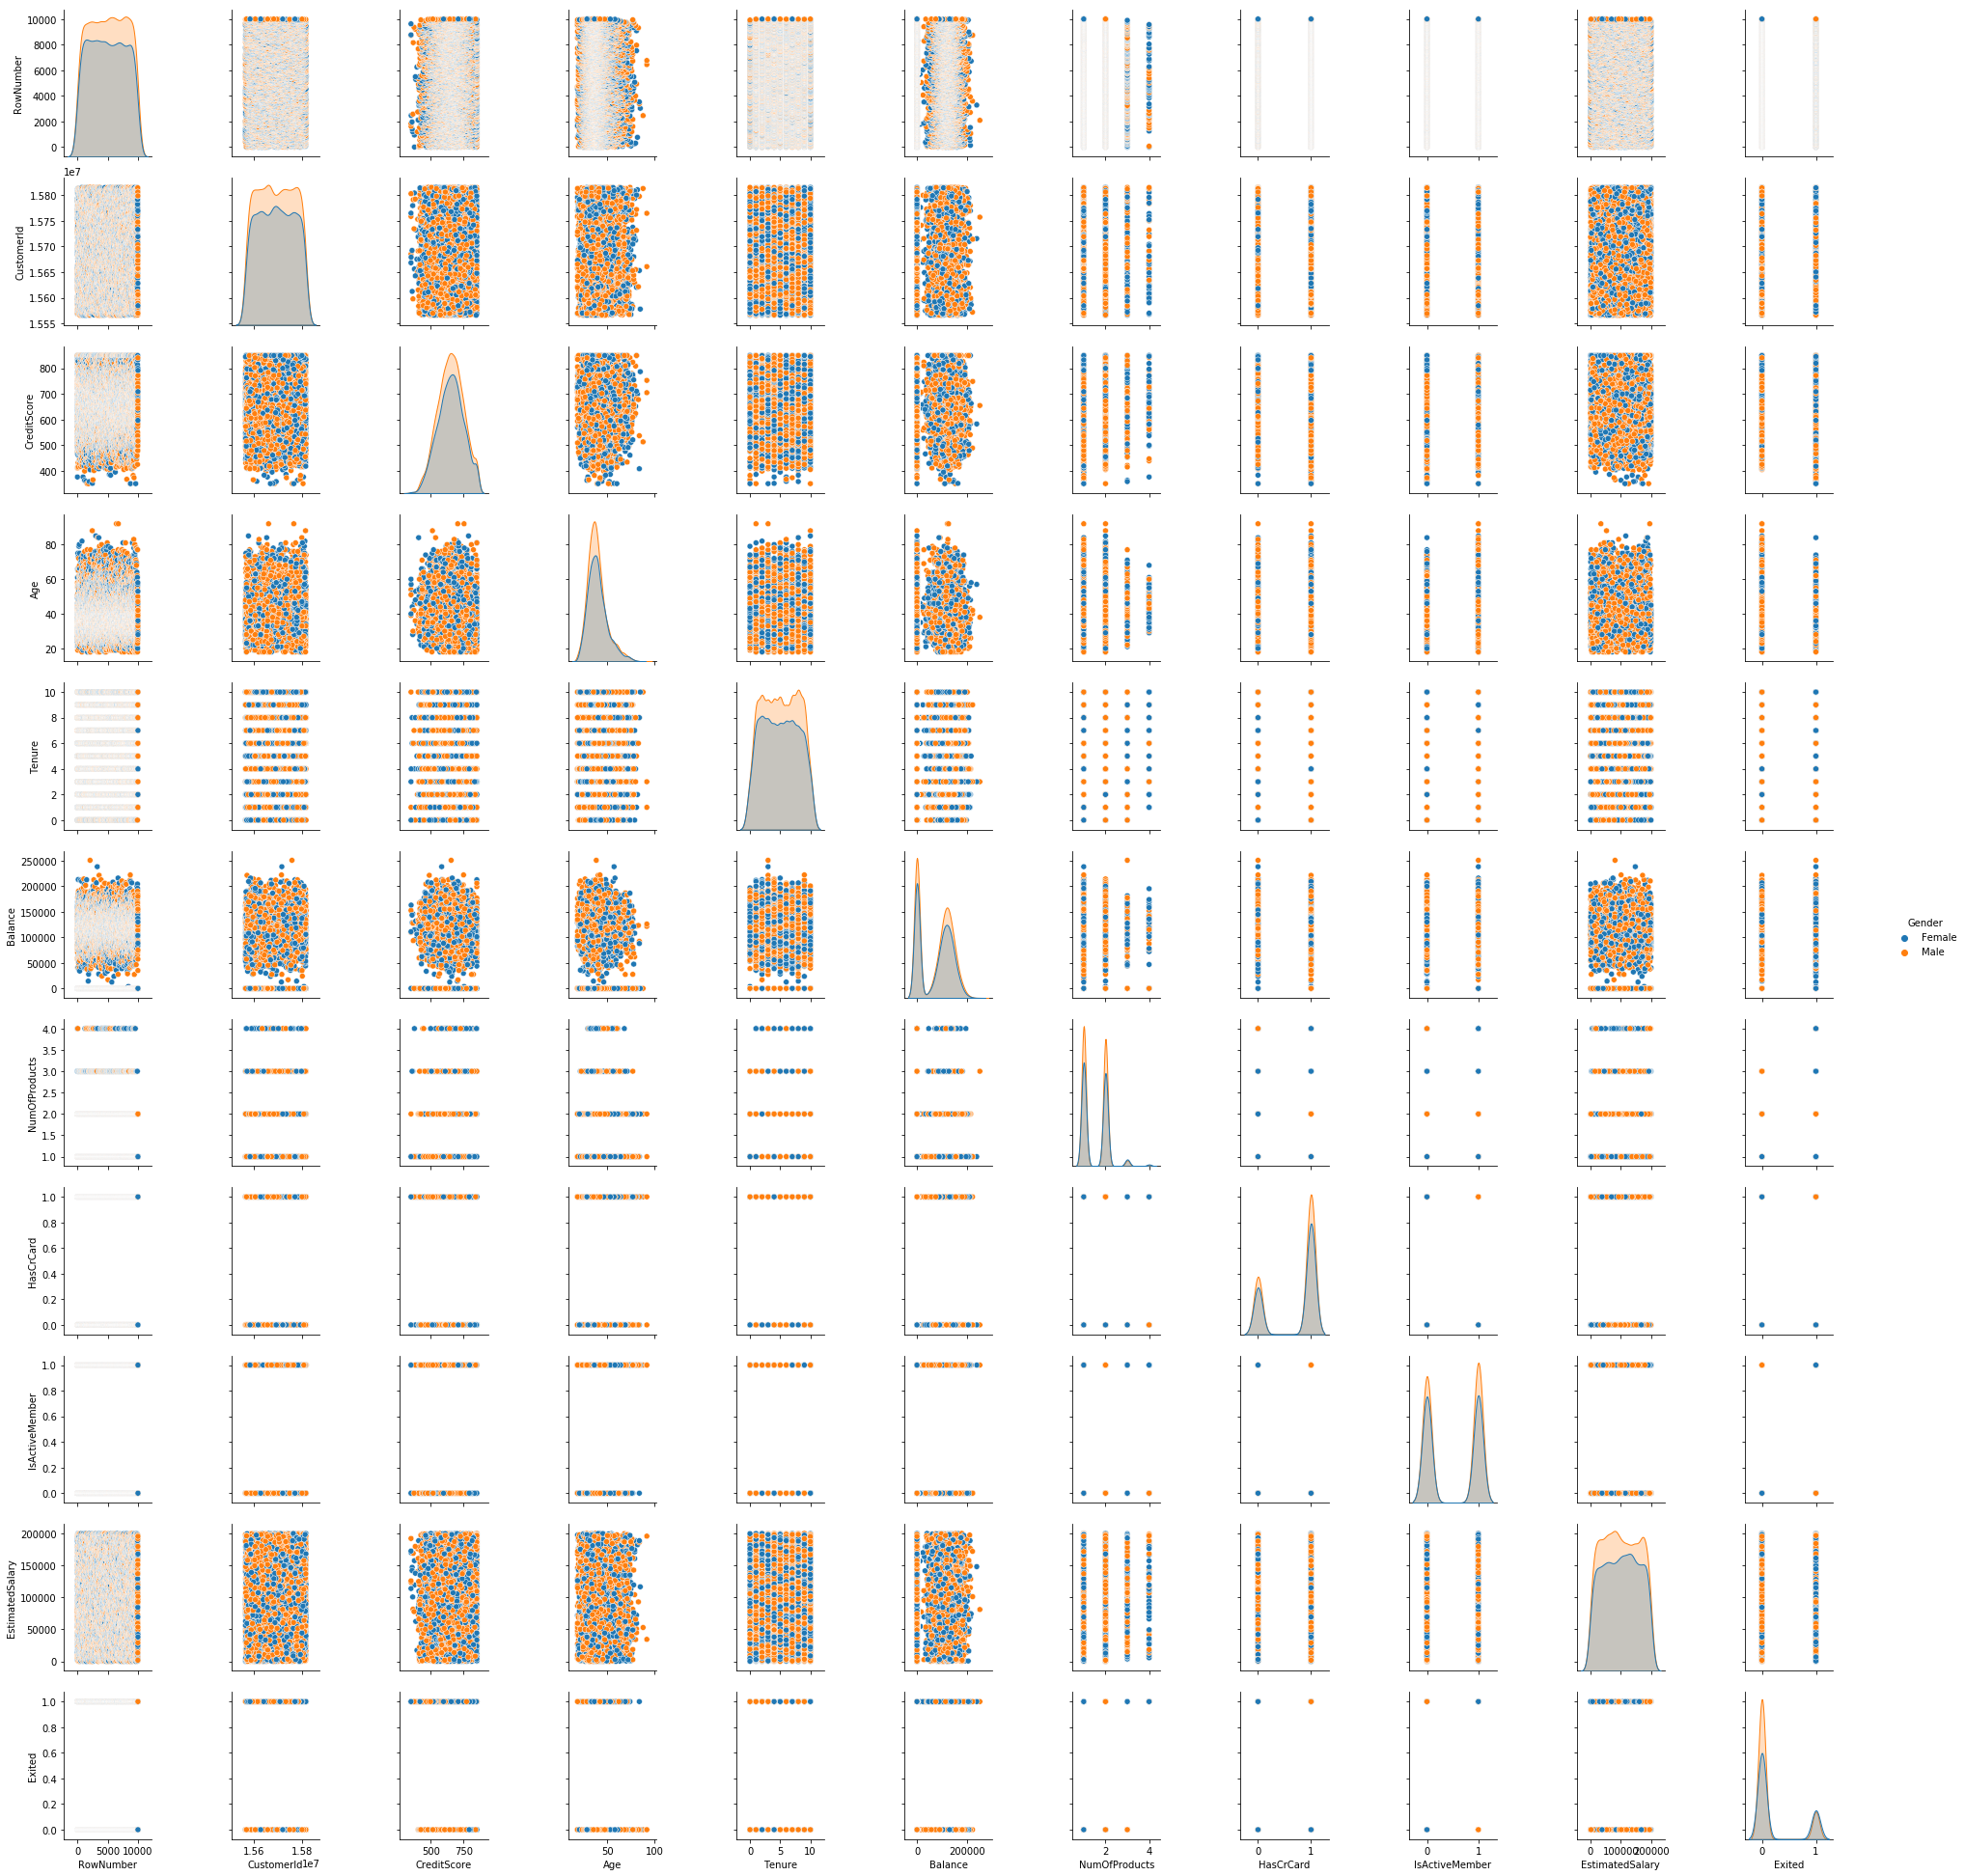

In [16]:
sns.pairplot(df, hue = "Gender")

## 4. Perform Descriptive Analysis

In [17]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handling Missing values

In [18]:
df.isnull().any() #No missing values

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## 6.  Find the outliers and replace the outliers

In [297]:
outlier = df.quantile(q=(0.75,0.25))
outlier

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0


In [298]:
out = outlier.iloc[0]-outlier.iloc[1]
out

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [304]:
low = outlier.iloc[1] - (1.5*out)
low

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [303]:
low['Age']

14.0

In [305]:
high = outlier.iloc[1] + (1.5*out)
high

RowNumber          1.000000e+04
CustomerId         1.581559e+07
CreditScore        7.850000e+02
Age                5.000000e+01
Tenure             9.000000e+00
Balance            1.914664e+05
NumOfProducts      2.500000e+00
HasCrCard          1.500000e+00
IsActiveMember     1.500000e+00
EstimatedSalary    1.985813e+05
Exited             0.000000e+00
dtype: float64

In [307]:
high['Age']

50.0

In [308]:
df['Age']=np.where(df['Age']>high['Age'],high['Age'],np.where(df['Age']<low['Age'],low['Age'],df['Age']))

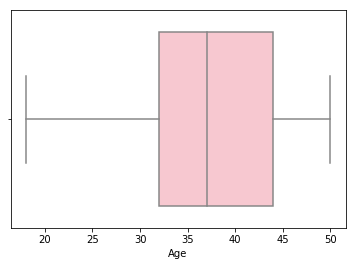

In [325]:
sns.boxplot(x = 'Age', data = df, color = 'pink')

## 7. Check for Categorical columns and perform encoding.


In [227]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [228]:
numerical = df[['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
categorical = df[['Surname', 'Geography', 'Gender']]

In [229]:
numerical.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [230]:
categorical.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [231]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [232]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [233]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [234]:
from sklearn.preprocessing import OneHotEncoder
x = categorical.values
x.shape

(10000, 3)

In [235]:
from sklearn.compose import ColumnTransformer

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [237]:
geo =  ColumnTransformer([("oh",OneHotEncoder(),[1])],remainder="passthrough" )

In [253]:
geography = geo.fit_transform(x)
geography.shape

(10000, 5)

In [254]:
geography

array([[1.0, 0.0, 0.0, 'Hargrave', 'Female'],
       [0.0, 0.0, 1.0, 'Hill', 'Female'],
       [1.0, 0.0, 0.0, 'Onio', 'Female'],
       ...,
       [1.0, 0.0, 0.0, 'Liu', 'Female'],
       [0.0, 1.0, 0.0, 'Sabbatini', 'Male'],
       [1.0, 0.0, 0.0, 'Walker', 'Female']], dtype=object)

In [255]:
gen = ColumnTransformer([("oh",OneHotEncoder(),[-1])],remainder="passthrough" )
gender = gen.fit_transform(geography)
gender.shape

(10000, 6)

In [256]:
gender

array([[1.0, 0.0, 1.0, 0.0, 0.0, 'Hargrave'],
       [1.0, 0.0, 0.0, 0.0, 1.0, 'Hill'],
       [1.0, 0.0, 1.0, 0.0, 0.0, 'Onio'],
       ...,
       [1.0, 0.0, 1.0, 0.0, 0.0, 'Liu'],
       [0.0, 1.0, 0.0, 1.0, 0.0, 'Sabbatini'],
       [1.0, 0.0, 1.0, 0.0, 0.0, 'Walker']], dtype=object)

In [261]:
sur = ColumnTransformer([("oh",OneHotEncoder(),[-1])],remainder="passthrough" )
surname = sur.fit_transform(gender)
surname.shape

(10000, 2937)

In [267]:
surname.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [271]:
surname[0].toarray()

array([[0., 0., 0., ..., 1., 0., 0.]])

## 8.  Split the data into dependent and independent variables

In [264]:
indep = df.iloc[:, :-1]
dep = df.iloc[:,-1:]

In [265]:
indep.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [266]:
dep.head(5)

,Exited
0,1
1,0
2,1
3,0
4,0


## 9. Scale the independent variables

In [272]:
from sklearn.preprocessing import StandardScaler

In [282]:

independent =df[['Age','Tenure','CustomerId','CreditScore']].values
sc = StandardScaler()
x_std = sc.fit_transform(independent)
x_std

array([[ 0.29351742, -1.04175968, -0.78321342, -0.32622142],
       [ 0.19816383, -1.38753759, -0.60653412, -0.44003595],
       [ 0.29351742,  1.03290776, -0.99588476, -1.53679418],
       ...,
       [-0.27860412,  0.68712986, -1.47928179,  0.60498839],
       [ 0.29351742, -0.69598177, -0.11935577,  1.25683526],
       [-1.04143285, -0.35020386, -0.87055909,  1.46377078]])

## 10.  Split the data into training and testing

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [285]:
x_train.shape

(8000, 4)

In [286]:
x_test.shape

(2000, 4)

In [311]:
x_train

array([[      34,        5, 15676909,      667],
       [      42,        1, 15749265,      427],
       [      29,        2, 15582492,      535],
       ...,
       [      35,        5, 15574372,      738],
       [      38,        9, 15664035,      590],
       [      48,        1, 15592816,      623]], dtype=int64)

In [312]:
x_test

array([[      35,        8, 15615753,      597],
       [      40,        2, 15654700,      523],
       [      42,        8, 15633877,      706],
       ...,
       [      36,        1, 15772604,      578],
       [      34,        4, 15787699,      650],
       [      30,        8, 15579223,      573]], dtype=int64)

In [313]:
y_test.shape

(2000, 1)

In [314]:
y_train.shape

(8000, 1)

In [315]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [316]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)